### Customer Segmentation



### Project Overview: Customer Segmentation Using Clustering

Clustering is a key unsupervised machine learning technique used to discover natural groupings within data, particularly when labels are unavailable. It plays a significant role across various scientific, engineering, and business domains, enabling deeper insights and data-driven decisions.

This project focuses on customer segmentation for a shopping mall, leveraging clustering algorithms to analyze customer behavior and identify patterns. By segmenting customers into meaningful groups, businesses can tailor their marketing strategies, optimize customer engagement, and enhance profitability.

---

### Dataset Features and Descriptions

Below are the features of the dataset, providing insights into customer credit card usage and payment behaviors:

1. **CUST_ID**: Unique identifier for each credit card holder.  
2. **BALANCE**: Monthly average balance, calculated as the daily average balance over the past 12 months.  
3. **BALANCE_FREQUENCY**: Frequency of balance updates over the last 12 months (1 = Frequently updated, 0 = Not frequently updated).  
4. **PURCHASES**: Total purchase amount spent by the customer in the last 12 months.  
5. **ONEOFF_PURCHASES**: Total amount spent on one-off purchases.  
6. **INSTALLMENTS_PURCHASES**: Total amount spent on installment-based purchases.  
7. **CASH_ADVANCE**: Total amount withdrawn through cash advances.  
8. **PURCHASES_FREQUENCY**: Frequency of purchases (1 = Frequent purchases, 0 = Rare purchases).  
9. **ONEOFF_PURCHASES_FREQUENCY**: Frequency of one-off purchases (1 = Frequent, 0 = Rare).  
10. **PURCHASES_INSTALLMENTS_FREQUENCY**: Frequency of installment-based purchases (1 = Frequent, 0 = Rare).  
11. **CASHADVANCE_FREQUENCY**: Frequency of cash advances.  
12. **CASH_ADVANCE_TRX**: Average amount per cash-advance transaction.  
13. **PURCHASES_TRX**: Average amount per purchase transaction.  
14. **CREDIT_LIMIT**: Credit limit assigned to the customer.  
15. **PAYMENTS**: Total payments made by the customer to reduce their statement balance.  
16. **MINIMUM_PAYMENTS**: Total minimum payments due during the period.  
17. **PRC_FULL_PAYMENT**: Percentage of months in which the customer paid their full statement balance.  
18. **TENURE**: Number of months the customer has held their credit card.  

---

### Objective and Value
By applying clustering to this dataset, the project aims to group customers based on their credit card usage patterns. These insights can help businesses:  
- **Personalize Offers**: Tailor marketing strategies to meet specific customer needs.  
- **Enhance Retention**: Identify high-value customers and implement retention strategies.  
- **Optimize Services**: Understand diverse customer behaviors to improve product offerings and financial services.  

This project demonstrates how unsupervised learning algorithms, such as K-means clustering, can transform raw data into actionable business intelligence.



In [1]:
# Data
import pandas as pd
import numpy as np
from scipy import stats

#Collections library for counting elements in a list
#from collections import Counter

#tqdm library for progress bars
#from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from termcolor import colored

# Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


# Train Test Split
from sklearn.model_selection import train_test_split


# scipy library for hierarchical clustering
from scipy.cluster.hierarchy import ward, dendrogram, linkage
from scipy.cluster import hierarchy





# sklearn library
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Scaling
from sklearn.preprocessing import StandardScaler

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Customer_Data.csv')

In [3]:
df = pd.DataFrame(data)
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [4]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [5]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

column   dtypes  nunique  sum_null
0                            CUST_ID   object     8950         0
1                            BALANCE  float64     8871         0
2                  BALANCE_FREQUENCY  float64       43         0
3                          PURCHASES  float64     6203         0
4                   ONEOFF_PURCHASES  float64     4014         0
5             INSTALLMENTS_PURCHASES  float64     4452         0
6                       CASH_ADVANCE  float64     4323         0
7                PURCHASES_FREQUENCY  float64       47         0
8         ONEOFF_PURCHASES_FREQUENCY  float64       47         0
9   PURCHASES_INSTALLMENTS_FREQUENCY  float64       47         0
10            CASH_ADVANCE_FREQUENCY  float64       54         0
11                  CASH_ADVANCE_TRX    int64       65         0
12                     PURCHASES_TRX    int64      173         0
13                      CREDIT_LIMIT  float64      205         1
14                          PAYMENTS  float64     8711         0
15                  MINIMUM_PAYMENTS  float64     8636       313
16                  PRC_FULL_PAYMENT  float64       47         0
17                            TENURE    int64        7         0

Data Cleaning

In [6]:
# Check the Null value for 'Credit Limit'
null = df[df['CREDIT_LIMIT'].isnull()]
null

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [7]:
# Drop the missing value for 'Credit Limit'
df = df.drop(5203)
df = df.reset_index(drop=True)
df.shape

(8949, 18)

In [8]:
# Check the Null value for 'MINIMUM_PAYMENTS'
df[['MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

MINIMUM_PAYMENTS
3                  NaN
45                 NaN
47                 NaN
54                 NaN
55                 NaN
...                ...
8918               NaN
8928               NaN
8934               NaN
8943               NaN
8945               NaN

[313 rows x 1 columns]

In [9]:
# Fill missing values in the 'MINIMUM_PAYMENTS' column with the median value
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df.shape

(8949, 18)

In [10]:
# Drop CUST_ID column
df.drop(['CUST_ID'], axis=1, inplace=True)
df.shape

(8949, 17)

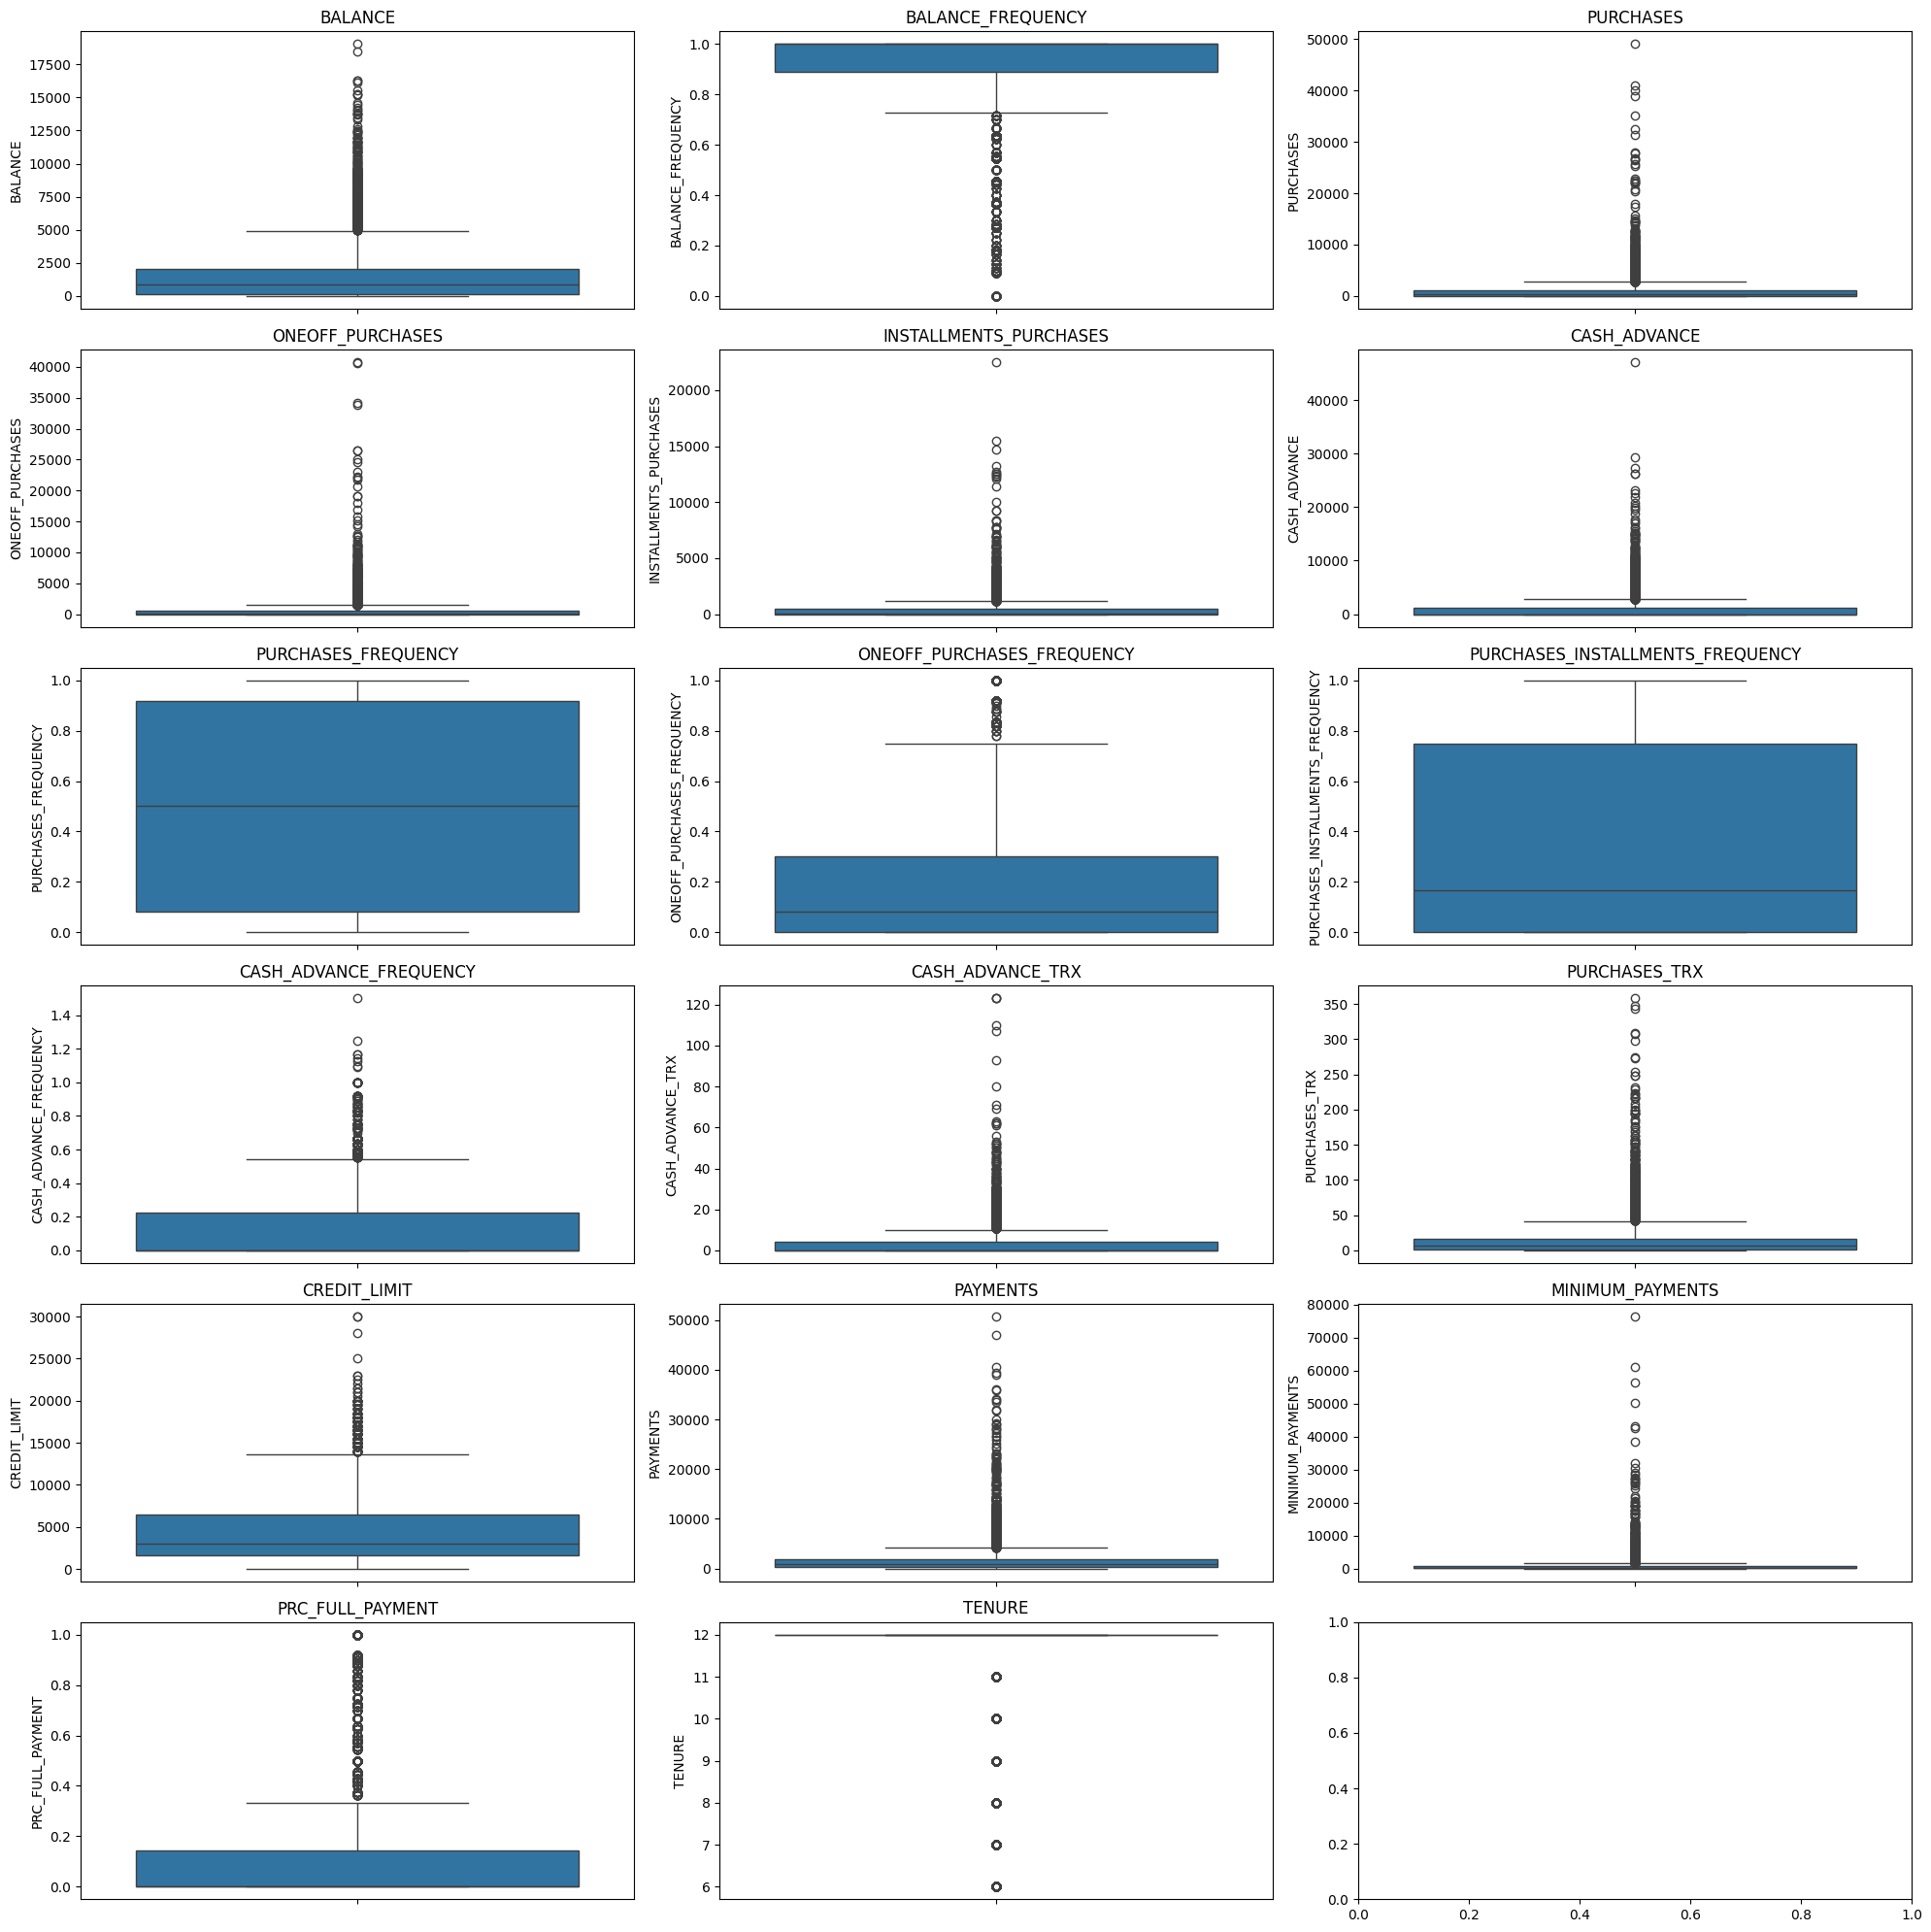

In [11]:
fig= plt.subplots(nrows=6 , ncols=3 , figsize=(20,20))
for i in range (len(df.columns)):
    plt.subplot(6,3,i+1)
    ax= sns.boxplot(df[df.columns[i]])
    plt.title(df.columns[i])
    plt.tight_layout()
plt.show()

This visualization consists of box plots for various features of the dataset. Each subplot shows the distribution of a particular variable, highlighting key statistical information like median, quartiles, and potential outliers. Below is a detailed explanation of the insights these box plots reveal:

---

### General Insights from the Box Plots:
1. **Median (Central Line in the Box)**:
   - The central horizontal line in each box represents the median value for the feature.
   - This gives an idea of the central tendency of the data.

2. **Interquartile Range (IQR)**:
   - The height of the box represents the IQR, which is the range between the 25th percentile (lower quartile) and the 75th percentile (upper quartile).
   - This indicates the spread of the majority of the data points.

3. **Whiskers**:
   - The whiskers extend to the data points that are within 1.5 times the IQR from the box edges.
   - Values beyond these whiskers are considered **outliers**.

4. **Outliers (Dots Beyond Whiskers)**:
   - These are extreme values that lie significantly outside the range of most of the data.
   - Outliers can represent unique cases or data errors and may require special handling depending on the context.

---

### Feature-Specific Observations:

1. **BALANCE**:
   - Most customers have low monthly balances, but there are significant outliers with balances as high as 17,500.
   - The median is close to zero, suggesting that many customers keep their balances minimal.

2. **BALANCE_FREQUENCY**:
   - Values cluster close to 1, indicating that most customers frequently update their balances.
   - There are no major outliers in this feature.

3. **PURCHASES**:
   - Total purchase amounts are generally low for most customers, but there are some extreme outliers with values exceeding 40,000.
   - The box is tightly packed, reflecting a majority of customers with minimal spending.

4. **ONEOFF_PURCHASES**:
   - Similar to `PURCHASES`, the majority of customers have low one-off purchases, while a few have significantly high values.

5. **INSTALLMENTS_PURCHASES**:
   - Most installment purchases are minimal, but some customers exhibit high outlier values.
   - The median is much lower than the upper range of the outliers.

6. **CASH_ADVANCE**:
   - Cash advances are mostly low, but some customers utilize significant amounts, as seen in the outliers.

7. **PURCHASES_FREQUENCY**:
   - This is mostly skewed towards 1, indicating frequent purchasing behavior among many customers.
   - There are minimal outliers.

8. **ONEOFF_PURCHASES_FREQUENCY**:
   - A significant portion of customers exhibit infrequent one-off purchases, but there are cases where this behavior is frequent.

9. **PURCHASES_INSTALLMENTS_FREQUENCY**:
   - Installment-based purchases are common, with many customers scoring close to 1, indicating frequent usage.

10. **CASHADVANCE_FREQUENCY**:
    - Cash advances are generally infrequent, but there are outliers representing customers who rely heavily on this feature.

11. **CASH_ADVANCE_TRX**:
    - Most customers have low average cash advance transaction amounts, but the outliers suggest significant usage among a few customers.

12. **PURCHASES_TRX**:
    - Similar to other purchase-related features, most customers have low values, with a few significant outliers.

13. **CREDIT_LIMIT**:
    - Credit limits vary widely among customers, with some having significantly higher limits, as shown by the outliers.
    - The median and IQR indicate most customers have moderate credit limits.

14. **PAYMENTS**:
    - Total payments are mostly concentrated around low values, but a few customers exhibit very high payment amounts.

15. **MINIMUM_PAYMENTS**:
    - Most customers pay close to the minimum amount, but some make much higher minimum payments, as reflected by the outliers.

16. **PRC_FULL_PAYMENT**:
    - The percentage of full payments is clustered near zero for many customers, indicating that full payment behavior is rare.
    - There are no extreme outliers.

17. **TENURE**:
    - Most customers have tenure values tightly clustered around 12 months, suggesting stable long-term customer relationships.

---

### Key Takeaways:
- **Outliers**: Many features exhibit significant outliers, such as `BALANCE`, `PURCHASES`, and `CASH_ADVANCE`. These outliers may represent high-value customers or anomalous behavior.
- **Customer Behavior**: Features like `PURCHASES_FREQUENCY` and `BALANCE_FREQUENCY` suggest that many customers actively engage in financial transactions.
- **Skewness**: Several features, such as `BALANCE` and `CASH_ADVANCE`, are heavily skewed, with most customers exhibiting low values and a few showing high values.

These box plots provide a comprehensive overview of the dataset's distribution and help identify patterns, potential anomalies, and areas requiring preprocessing before clustering.

In [12]:
# Calculate the IQR for each column in the dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      695               1492        808              1013   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     867          1030                    0   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         782                                 0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     525               804            766           248   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0       808               909              1474    1365

In [13]:
outlier_counts = {}

for col in df.columns:
    outliers = df[stats.zscore(df[col]) > 3][col]
    outlier_counts[col] = outliers.count()

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df.T


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Outlier Count      196                  0        135               122   

               INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Outlier Count                     137           182                    0   

               ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Outlier Count                           0                                 0   

               CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Outlier Count                     199               172            185   

               CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Outlier Count           152       159               102                 0   

               TENURE  
Outlier Count       0

In [14]:
print('z-score', outlier_df.sum())

z-score Outlier Count    1741
dtype: int64


In [15]:
Outliers_Treatment = df.copy()

In [16]:
# Calculate the IQR for each column in the dataset
Q1 = Outliers_Treatment.quantile(0.25)
Q3 = Outliers_Treatment.quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower whisker values for each column
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)

# Replace outliers with upper or lower whisker values for each column
for col in Outliers_Treatment.columns:
    Outliers_Treatment[col] = np.where(Outliers_Treatment[col] > upper_whisker[col], upper_whisker[col], np.where(Outliers_Treatment[col] < lower_whisker[col], lower_whisker[col], Outliers_Treatment[col]))
    
# Recheck outliers using the IQR method
outliers = ((Outliers_Treatment < (Q1 - 1.5 * IQR)) | (Outliers_Treatment > (Q3 + 1.5 * IQR)))
num_outliers = outliers.sum()
num_outliers.to_frame().T

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        0                  0          0                 0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       0             0                    0   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                           0                                 0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       0                 0              0             0   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0         0                 0                 0       0

In [17]:
Outliers_Treatment.shape

(8949, 17)

Exploratory Data Analysis

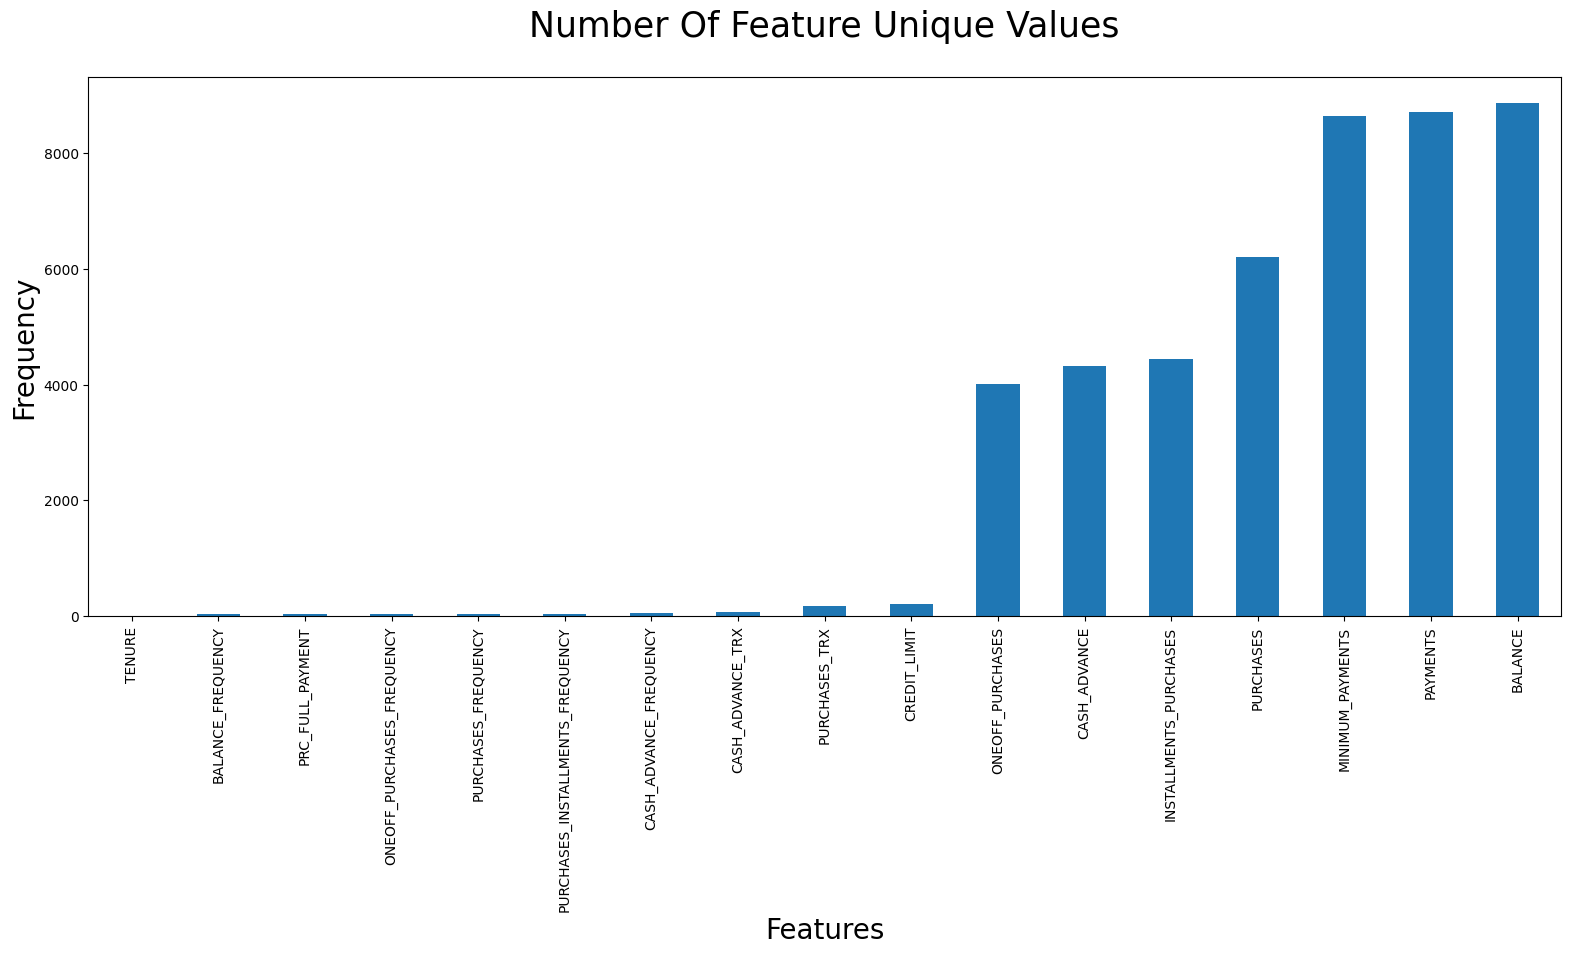

In [18]:
df1_value_counts = df.nunique()
ax = df1_value_counts.sort_values().plot.bar(figsize = (19,7))
plt.title("Number Of Feature Unique Values", size = 25, y = 1.06)
plt.ylabel("Frequency", size = 20)
plt.xlabel("Features", size = 20)

plt.show()

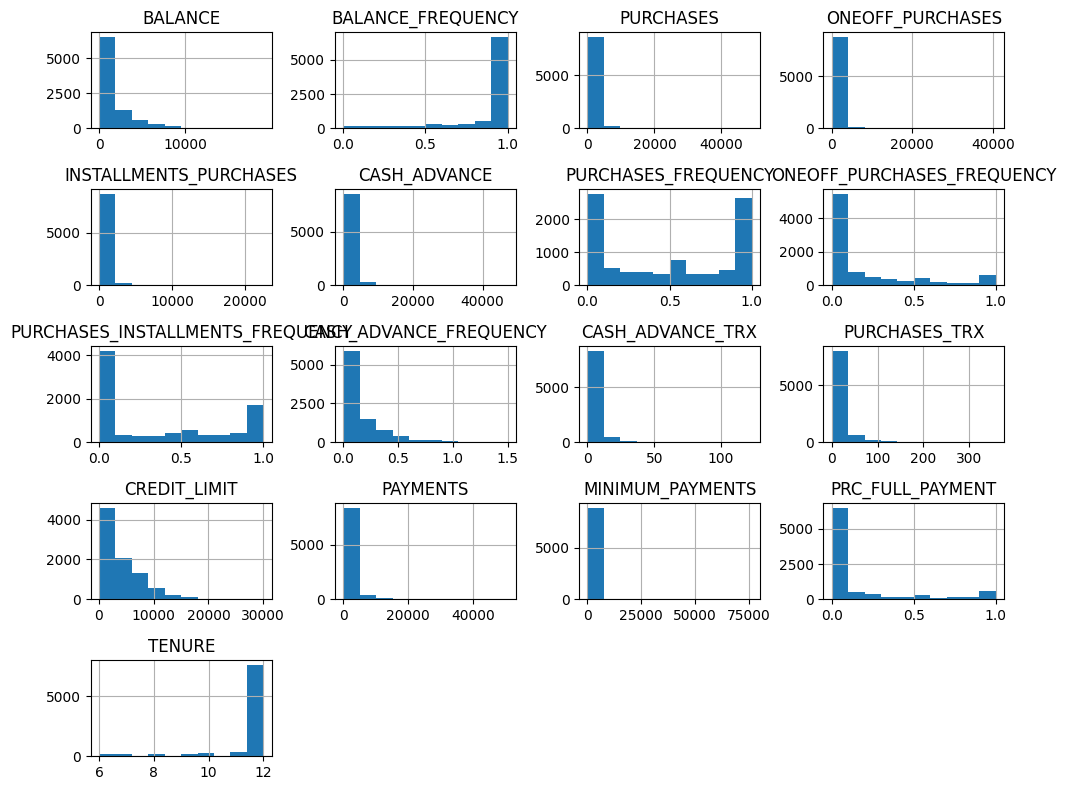

In [19]:
df.hist(figsize=(10,8))
plt.tight_layout()

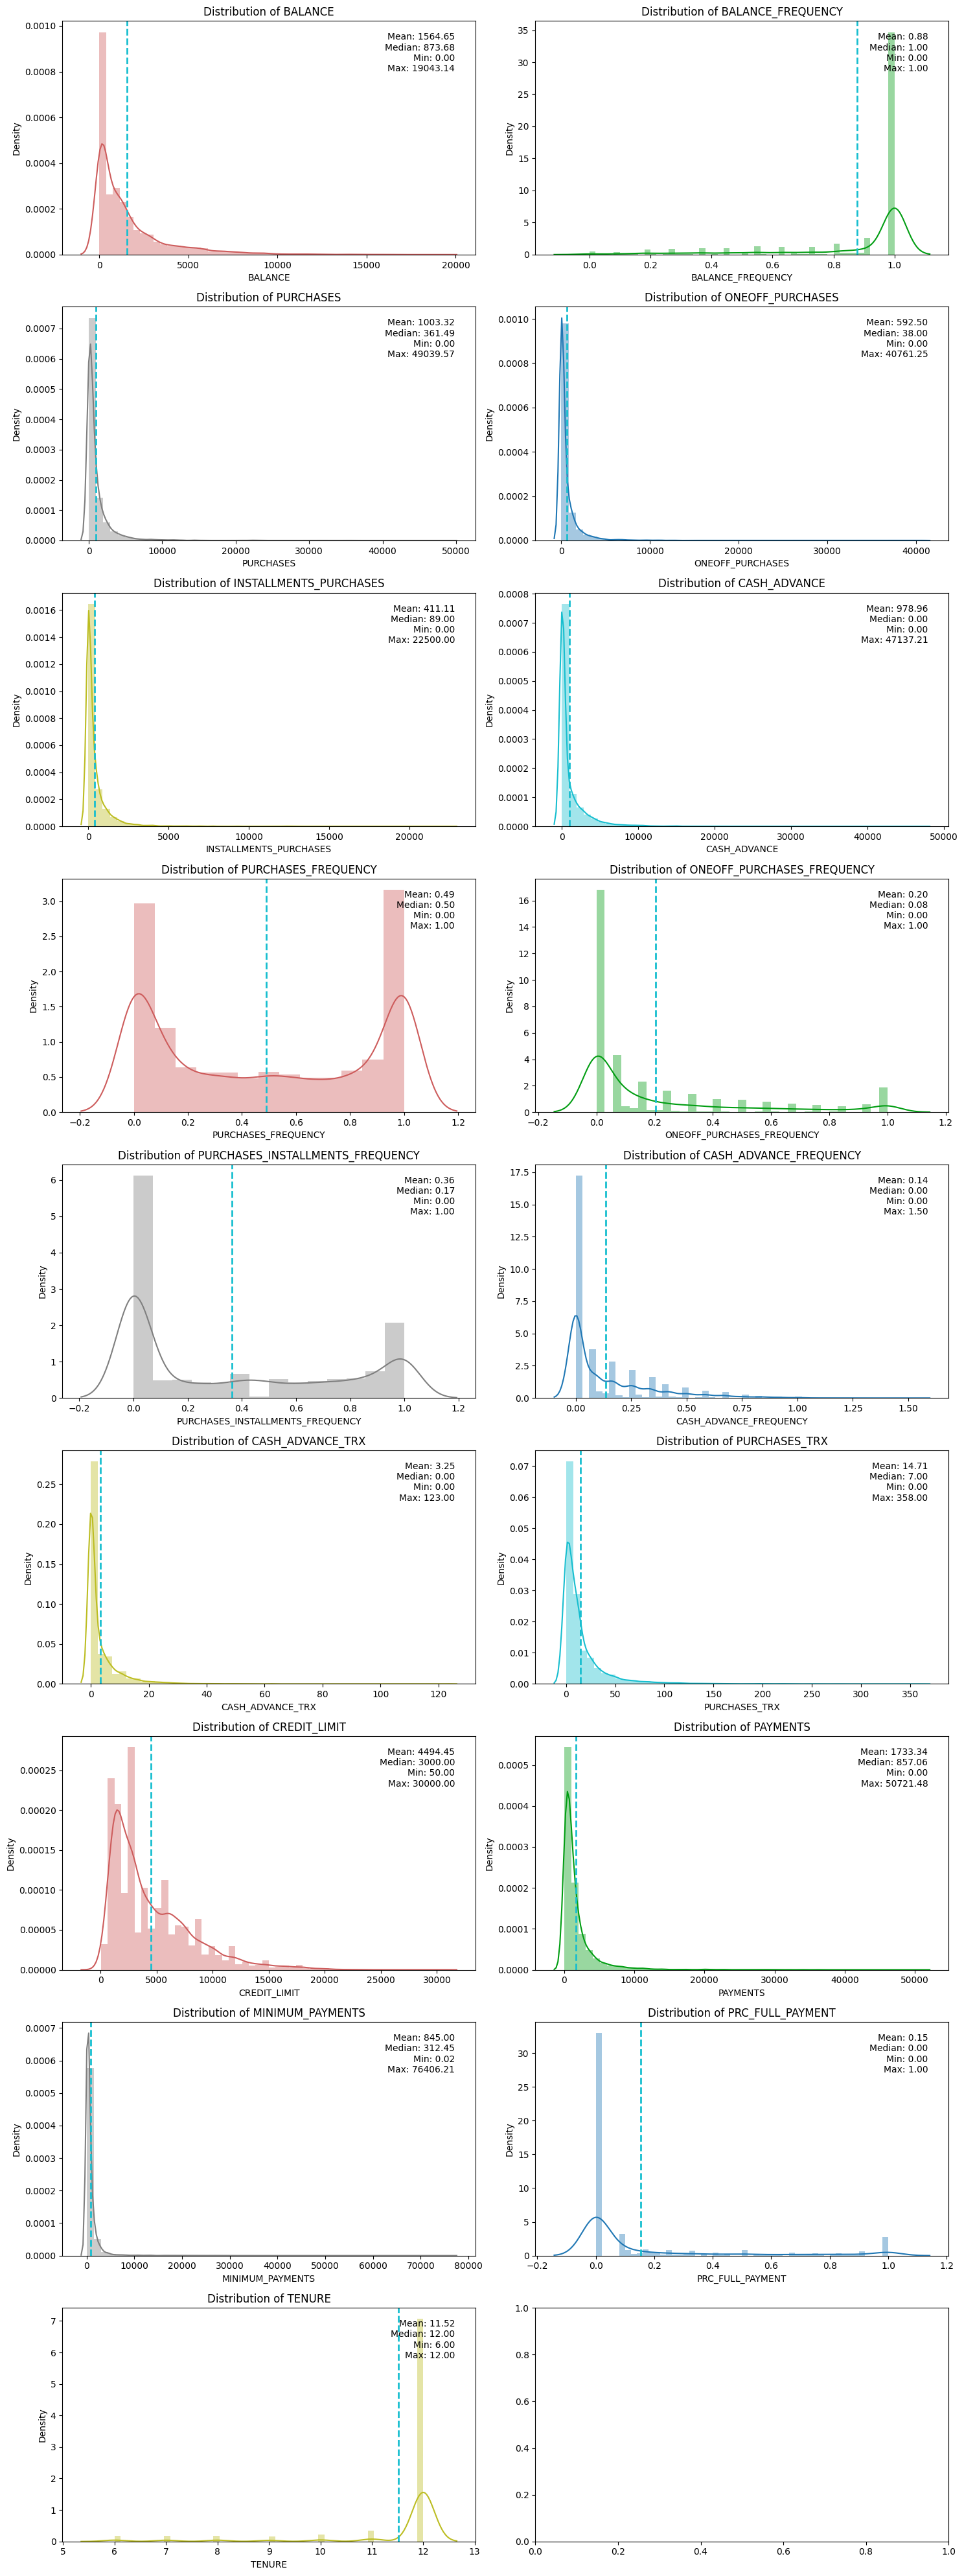

In [20]:
# Create subplots for all features
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15, 40))

# Define colors to use for each feature
colors = ['#CD5C5C', '#019d12', '#7F7F7F', '#1F77B4', '#BCBD22', '#17BECF']

# Loop through each column and plot distribution
for i, column in enumerate(df.columns):
    # Plot histogram with density curve
    sns.distplot(df[column], color=colors[i%6], ax=axes[i//2, i%2])
    
    # Add vertical lines for mean
    axes[i//2, i%2].axvline(x=df[column].mean(), color=colors[5], linestyle='--', linewidth=2)
    
    # Add text box with important statistics
    axes[i//2, i%2].text(0.95, 0.95, 
                          'Mean: {:.2f}\nMedian: {:.2f}\nMin: {:.2f}\nMax: {:.2f}'.format(
                              df[column].mean(), df[column].median(), df[column].min(), df[column].max()),
                          transform=axes[i//2, i%2].transAxes,
                          fontsize=10, va='top', ha='right')
    
    # Set title of subplot
    axes[i//2, i%2].set_title('Distribution of '+ column)

# Add overall title and adjust spacing
fig.suptitle('', fontsize=16)
fig.tight_layout()

The image shows the distribution plots for various financial features or metrics, likely related to customer credit card usage or spending behavior. These plots help us understand the data distribution, central tendencies, and variations for each feature. 

---

### **1. BALANCE**
- **Mean**: 1564.65, **Median**: 873.68  
- Distribution is highly **right-skewed**, indicating most customers have low balances, but a few have very high balances.

---

### **2. BALANCE_FREQUENCY**
- **Mean**: 0.88, **Median**: 1.00  
- A large proportion of customers frequently use their balance, as seen from the peak near **1.0**.

---

### **3. PURCHASES**
- **Mean**: 1003.32, **Median**: 361.48  
- Highly skewed distribution: many customers have low purchase values, with outliers spending significantly higher amounts.

---

### **4. ONEOFF_PURCHASES**
- **Mean**: 592.50, **Median**: 38.00  
- Indicates that most customers make low-value one-off purchases, with very few making large transactions.

---

### **5. INSTALLMENTS_PURCHASES**
- **Mean**: 411.11, **Median**: 80.00  
- Installment purchases are relatively low for most customers, though a small group has larger values.

---

### **6. CASH_ADVANCE**
- **Mean**: 978.96, **Median**: 0.00  
- Many customers do not use cash advances, but some depend on them heavily, as seen from the right skew.

---

### **7. PURCHASES_FREQUENCY**
- **Mean**: 0.49, **Median**: 0.50  
- Evenly distributed, with many customers making occasional purchases and others making frequent ones.

---

### **8. ONEOFF_PURCHASES_FREQUENCY**
- **Mean**: 0.20, **Median**: 0.06  
- Very low frequencies, indicating one-off purchases are rare for most customers.

---

### **9. PURCHASES_INSTALLMENTS_FREQUENCY**
- **Mean**: 0.36, **Median**: 0.17  
- Majority of customers rarely use installment purchases, but some have higher frequency.

---

### **10. CASH_ADVANCE_FREQUENCY**
- **Mean**: 0.14, **Median**: 0.00  
- Most customers do not frequently use cash advances.

---

### **11. CASH_ADVANCE_TRX**
- **Mean**: 3.25, **Median**: 0.00  
- Indicates that most customers rarely or never use cash advances, but a few make multiple transactions.

---

### **12. PURCHASES_TRX**
- **Mean**: 14.71, **Median**: 7.00  
- Most customers make fewer purchases, with the distribution skewed towards higher transaction counts.

---

### **13. CREDIT_LIMIT**
- **Mean**: 4454.45, **Median**: 3000.00  
- Most customers have a low-to-moderate credit limit, with a small group having much higher limits.

---

### **14. PAYMENTS**
- **Mean**: 1733.34, **Median**: 856.06  
- Most customers make low payments, with outliers making significantly larger payments.

---

### **15. MINIMUM_PAYMENTS**
- **Mean**: 845.04, **Median**: 312.45  
- Many customers pay close to the minimum amount, with some exceptions who pay higher.

---

### **16. PRC_FULL_PAYMENT**
- **Mean**: 0.15, **Median**: 0.00  
- Most customers rarely pay the full balance, as indicated by the low mean and median.

---

### **17. TENURE**
- **Mean**: 11.52, **Median**: 12.00  
- Most customers have a tenure close to the maximum value of 12 months, showing loyalty or long-term engagement.

---

### **Key Insights**
1. **Skewed Distributions**: Many features, such as purchases, balance, and cash advances, are heavily right-skewed. This indicates that a small number of customers dominate spending or borrowing behaviors.
2. **High Frequency Metrics**: Metrics like `BALANCE_FREQUENCY` and `TENURE` show high customer engagement or loyalty over time.
3. **Low Utilization of Cash Advances**: The low values for `CASH_ADVANCE_FREQUENCY` and `CASH_ADVANCE_TRX` suggest that cash advances are not a common feature for most customers.
4. **Low Full Payments**: `PRC_FULL_PAYMENT` indicates that only a minority of customers pay their balances in full.



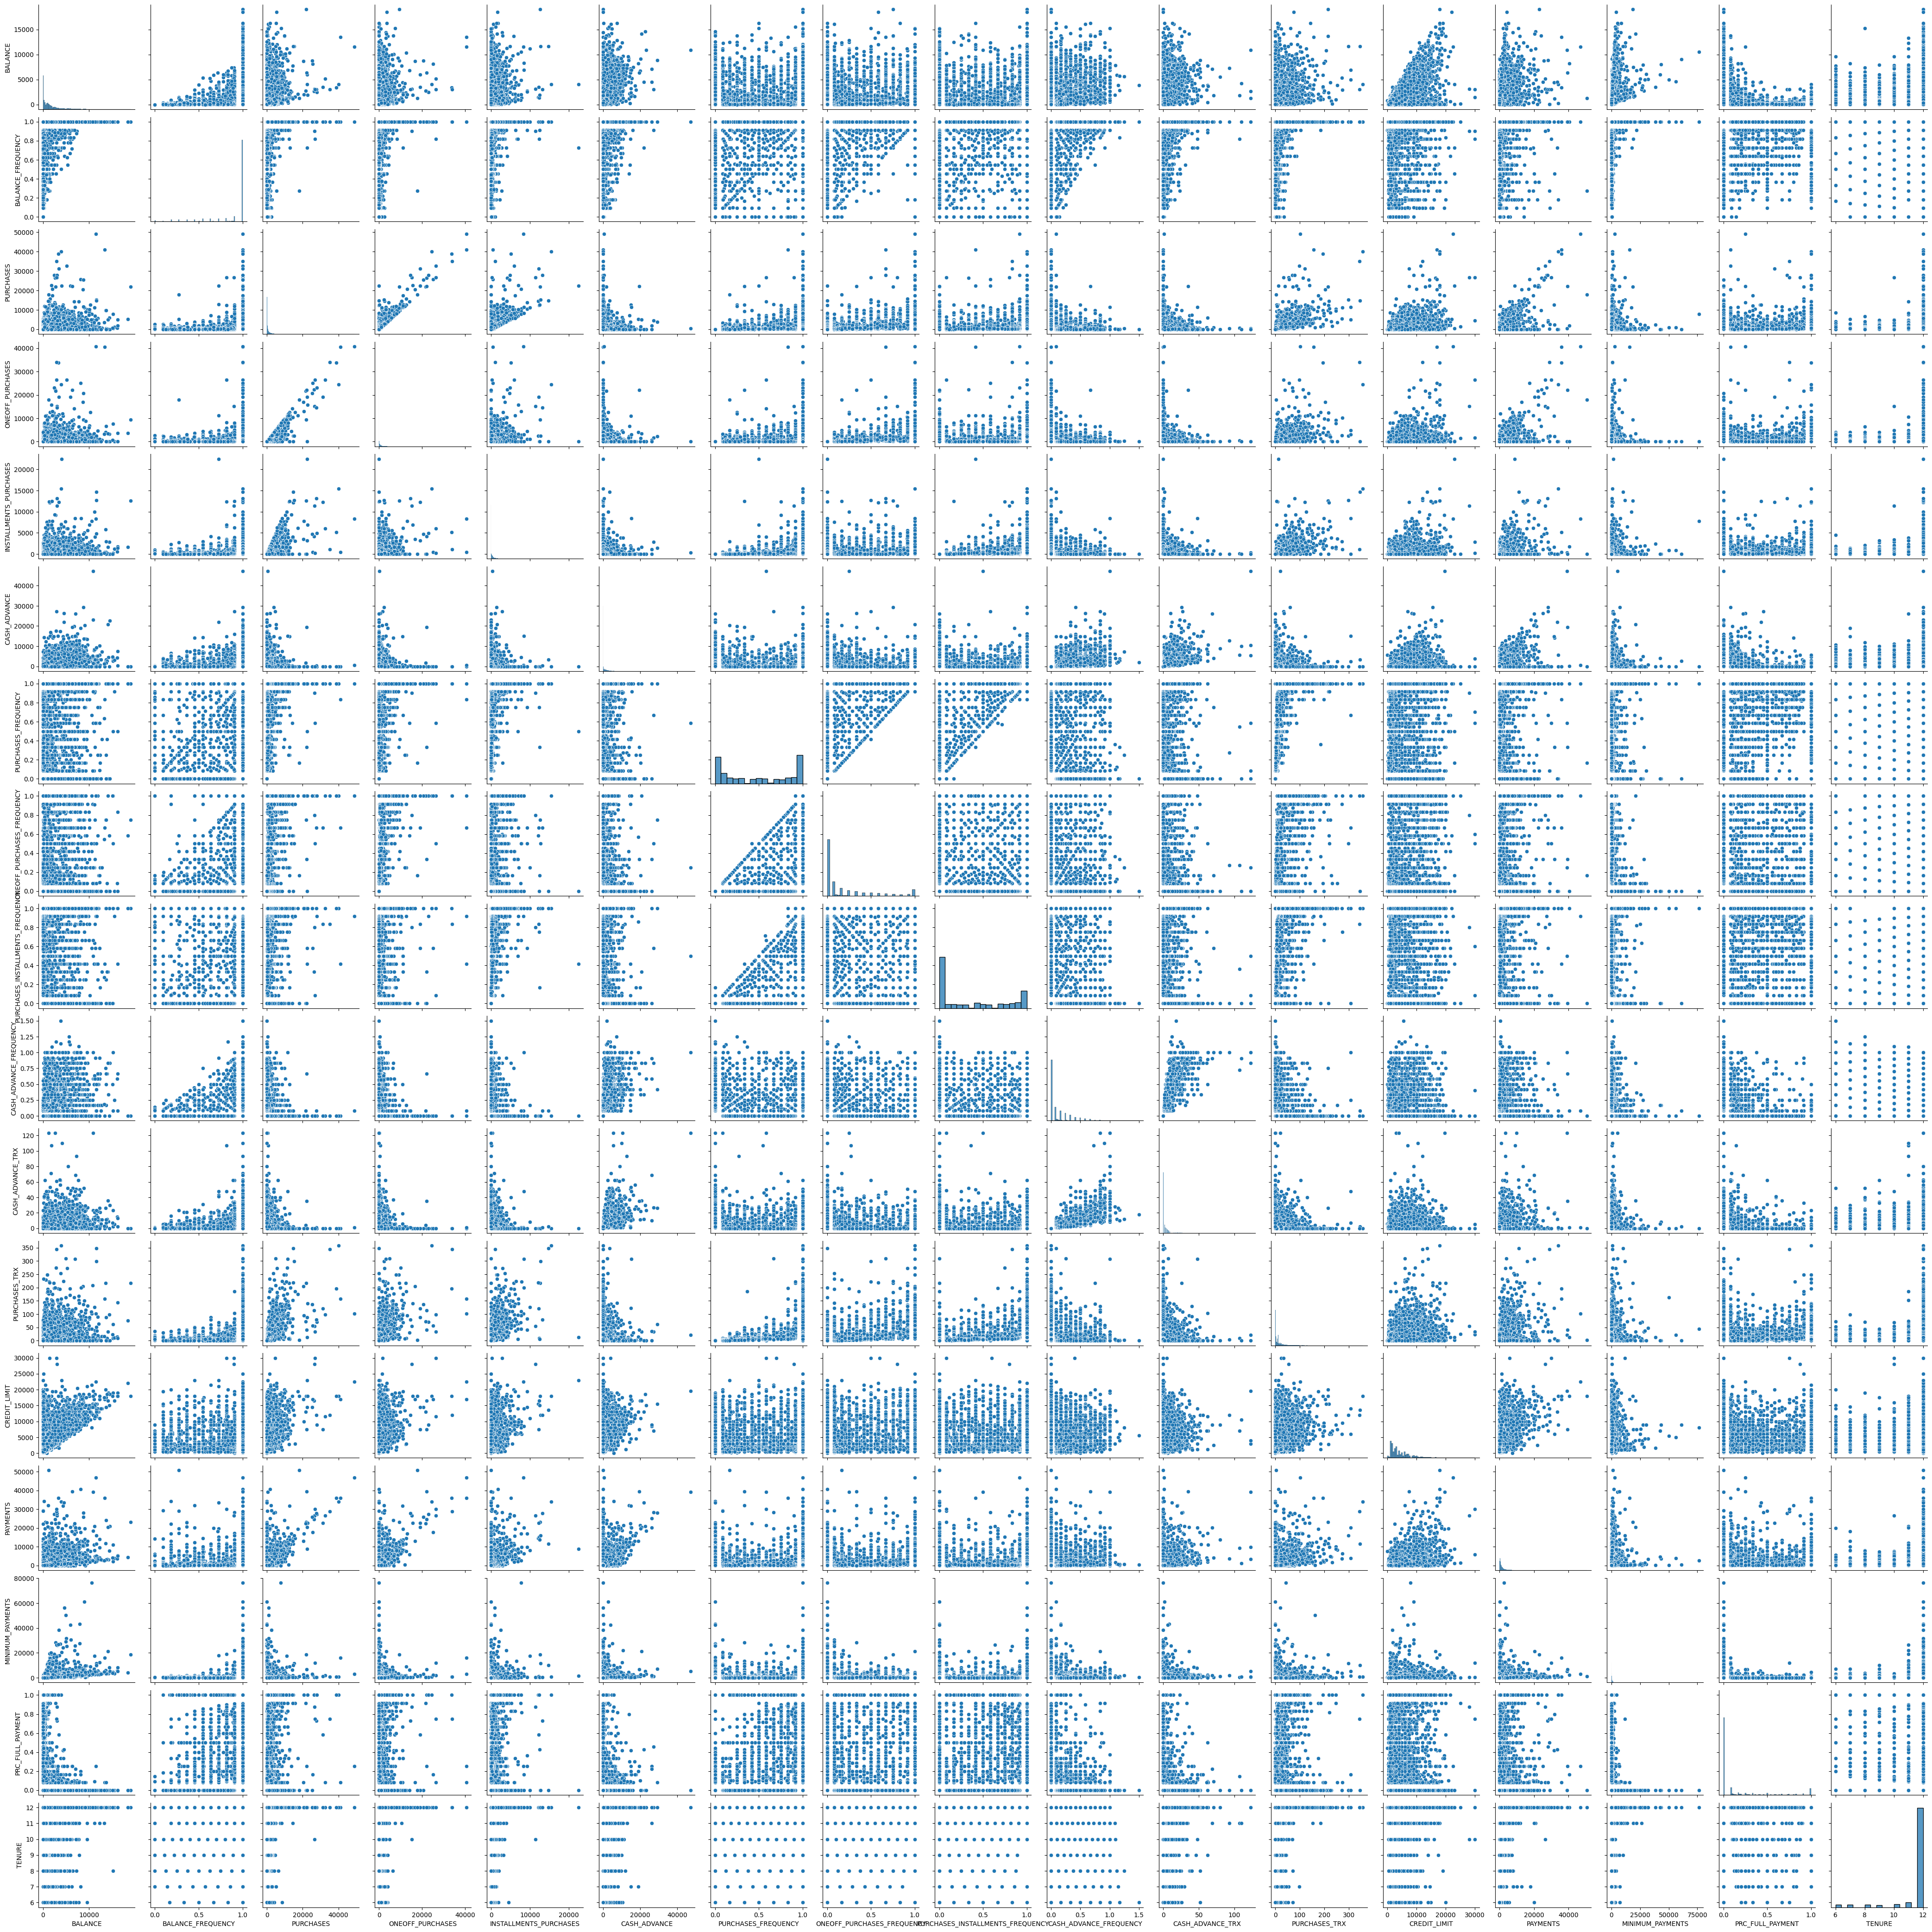

In [21]:
# Pairplot of all features
sns.pairplot(df)   
plt.show()

This image shows a **pair plot** (scatterplot matrix), a visualization that helps explore relationships between pairs of numerical variables in a dataset. Each small plot corresponds to a combination of two features, showing their joint distribution or relationship. Along the diagonal, you see histograms or density plots representing the distribution of individual features.

---

### **Key Observations from the Pair Plot**
1. **Diagonal Plots**:
   - These show the **distribution** of each feature individually. You can identify skewness, modality (unimodal or multimodal), and spread for each variable.

2. **Scatter Plots**:
   - The off-diagonal scatter plots visualize the relationships between two variables:
     - **Linear Relationships**: Some pairs show linear trends (e.g., `BALANCE` vs. `PAYMENTS`), indicating potential correlation.
     - **Non-Linear/No Trends**: Other pairs show no clear pattern, implying weak or no relationship.

3. **Clusters or Outliers**:
   - Certain scatter plots reveal **clusters**, which could represent groups within the data. 
   - You may also notice **outliers** (points far from the rest), especially in features like `CASH_ADVANCE`.

4. **Potential Correlations**:
   - Variables like `BALANCE` and `BALANCE_FREQUENCY` or `PAYMENTS` and `CREDIT_LIMIT` might exhibit strong relationships. These could be candidates for further correlation analysis.

5. **Feature Interactions**:
   - Variables with overlapping trends or distributions (e.g., `PURCHASES` and `ONEOFF_PURCHASES`) suggest shared behavior or dependencies.

---

### **How to Use This Visualization**
1. **Feature Selection**:
   - Identify redundant features that are highly correlated (e.g., `PURCHASES` vs. `ONEOFF_PURCHASES`) and consider combining or removing them.

2. **Clustering/Segmentation**:
   - Look for natural groupings to inform customer segmentation or classification tasks.

3. **Outlier Analysis**:
   - Highlight outliers for investigation, as they might skew statistical models or impact predictions.

4. **Hypothesis Testing**:
   - Use scatter plots to hypothesize potential causal relationships between variables, e.g., "Do higher credit limits lead to higher purchases?"



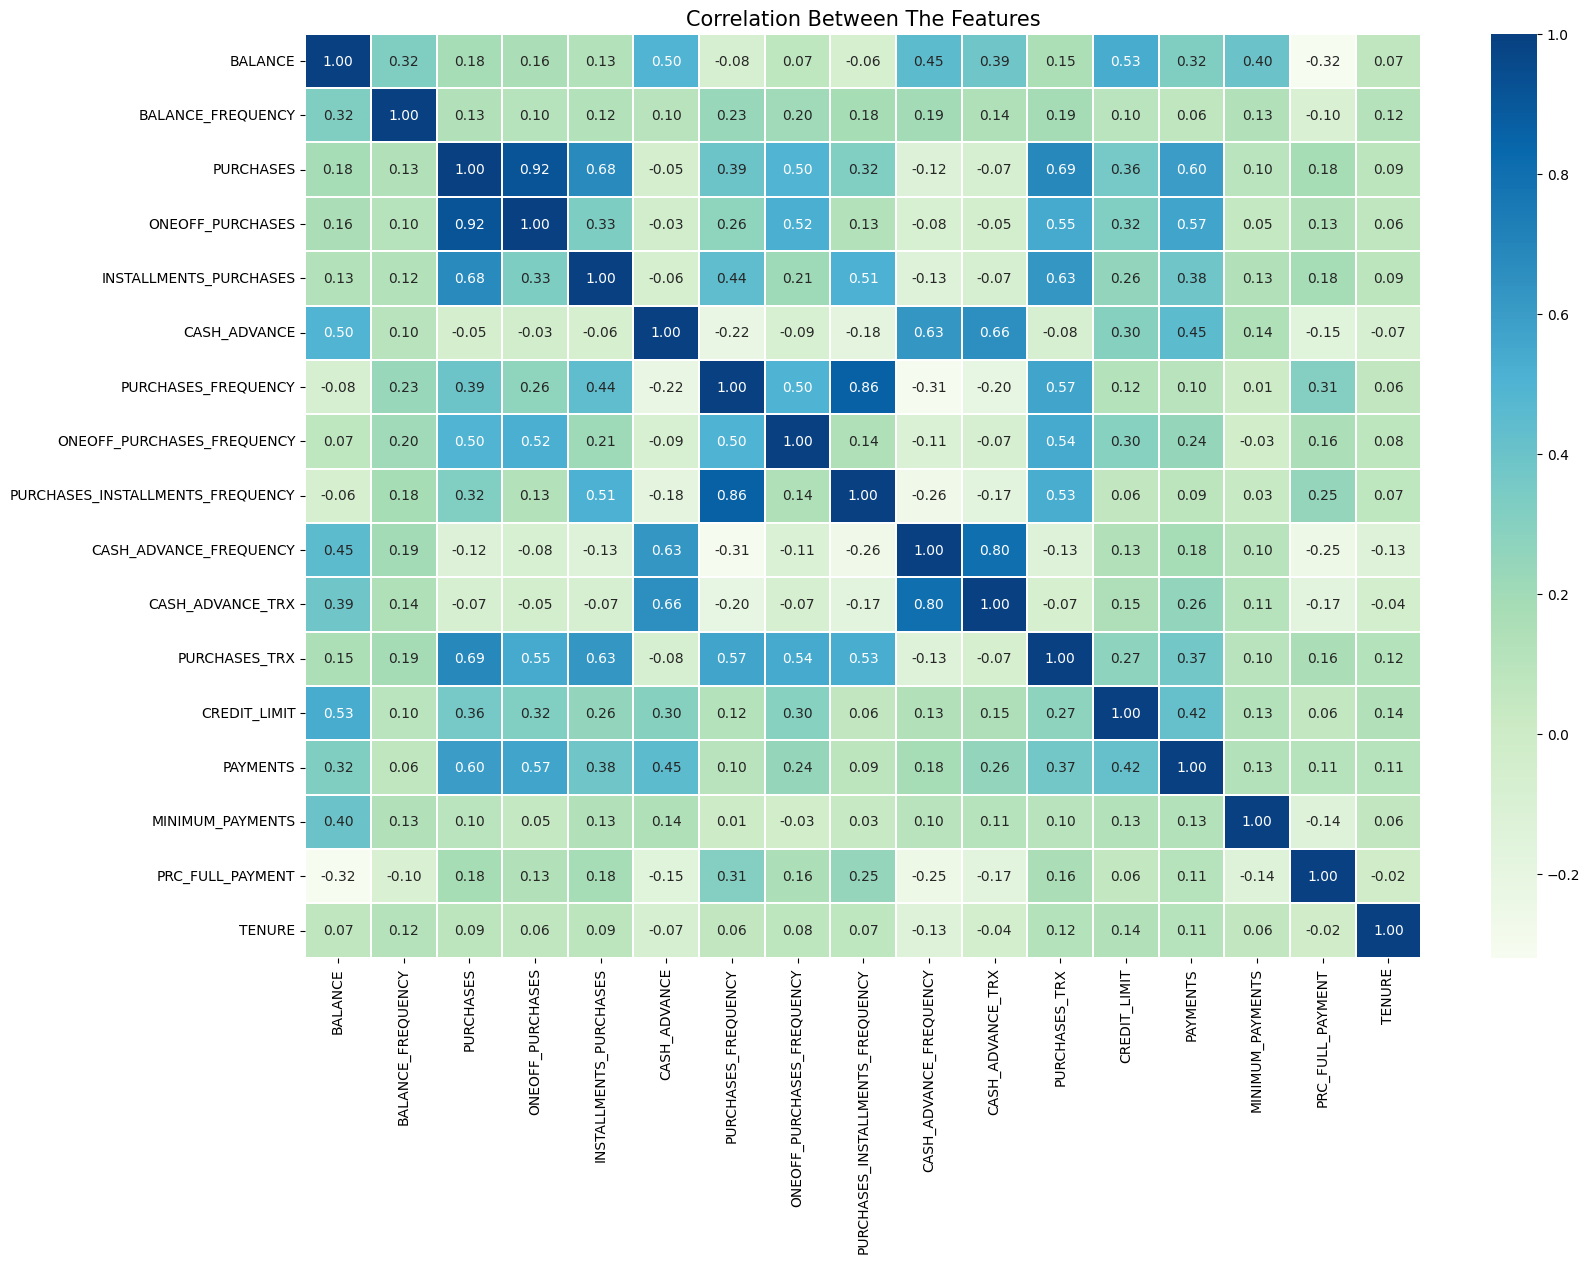

In [22]:
fig=plt.gcf()
fig.set_size_inches(18, 12)
plt.title('Correlation Between The Features', size=15)
a = sns.heatmap(df.corr(), annot = True, cmap = 'GnBu', fmt='.2f', linewidths=0.2)
plt.show()

This image is a **correlation heatmap** that visualizes the relationships between numerical features in a dataset. Each cell shows the correlation coefficient between two features, with the values ranging from -1 to 1. 

---

### **Key Points**
1. **Color Scale**:
   - **Dark blue**: High positive correlation (values close to 1).
   - **Light green**: Weak or no correlation (values close to 0).
   - **Dark green/Teal**: Negative correlation (values close to -1).

2. **Diagonal**:
   - The diagonal cells have a correlation of **1.0** because each feature is perfectly correlated with itself.

3. **Correlation Strength**:
   - **Positive Correlation**: As one feature increases, the other tends to increase (e.g., `PURCHASES` and `ONEOFF_PURCHASES` have a correlation of 0.92).
   - **Negative Correlation**: As one feature increases, the other tends to decrease (e.g., `BALANCE` and `PRC_FULL_PAYMENT` have a correlation of -0.32).
   - **No Correlation**: A value near 0 suggests no linear relationship between the features.

---

### **Insights from the Heatmap**
1. **High Correlations**:
   - `PURCHASES` and `ONEOFF_PURCHASES` (0.92): Indicates that these two features are closely related. Customers who make high purchases tend to make more one-off purchases.
   - `CASH_ADVANCE` and `CASH_ADVANCE_FREQUENCY` (0.80): High cash advances are associated with frequent usage of cash advance services.
   - `PURCHASES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY` (0.86): Indicates installment-based purchases are a significant part of frequent purchases.

2. **Negative Correlations**:
   - `PRC_FULL_PAYMENT` and `BALANCE` (-0.32): Suggests that customers who pay their balances in full tend to have lower outstanding balances.

3. **Moderate Correlations**:
   - `BALANCE` and `CREDIT_LIMIT` (0.53): Customers with higher credit limits tend to carry higher balances.
   - `PAYMENTS` and `PURCHASES` (0.66): Indicates that higher purchases are associated with higher payment amounts.

4. **Weak Correlations**:
   - Many features, such as `BALANCE_FREQUENCY` and others, show weak correlations with other variables, suggesting they might not strongly influence other factors.

---

### **How to Use This Visualization**
1. **Feature Engineering**:
   - Combine highly correlated features to reduce redundancy (e.g., `PURCHASES` and `ONEOFF_PURCHASES` could be merged).

2. **Model Insights**:
   - Use positively correlated features to predict related outcomes. For instance, `PURCHASES` could help predict `PAYMENTS`.

3. **Identify Key Drivers**:
   - Focus on features like `CASH_ADVANCE`, `CREDIT_LIMIT`, and `PURCHASES` as they exhibit strong relationships with multiple variables.

4. **Anomalies**:
   - Investigate features with unexpected or counterintuitive correlations to ensure data quality.



# Data Modeling

In [24]:
cols = df.columns
# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_col = scaler.fit_transform(df)
scaled_col = pd.DataFrame(scaled_col, columns=[cols])
scaled_col

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0    -0.732054         -0.249881 -0.424934        -0.356957   
1     0.786858          0.134049 -0.469584        -0.356957   
2     0.447041          0.517980 -0.107716         0.108843   
3     0.049015         -1.017743  0.231995         0.546123   
4    -0.358849          0.517980 -0.462095        -0.347317   
...        ...               ...       ...              ...   
8944 -0.738015          0.517980 -0.333331        -0.356957   
8945 -0.742488          0.517980 -0.329174        -0.356957   
8946 -0.740463         -0.185895 -0.402000        -0.356957   
8947 -0.745239         -0.185895 -0.469584        -0.356957   
8948 -0.572644         -0.889766  0.042092         0.301677   

     INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0                 -0.349114    -0.466805           -0.806649   
1                 -0.454607     2.605438           -1.221928   
2                 -0.454607    -0.466805            1.269742   
3                 -0.454607    -0.368678           -1.014290   
4                 -0.454607    -0.466805           -1.014290   
...                     ...          ...                 ...   
8944              -0.132688    -0.466805            1.269742   
8945              -0.122869    -0.466805            1.269742   
8946              -0.294930    -0.466805            0.854463   
8947              -0.454607    -0.449373           -1.221928   
8948              -0.454607    -0.406228            0.439186   

     ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     -0.678716                        -0.707409   
1                     -0.678716                        -0.917090   
2                      2.673295                        -0.917090   
3                     -0.399383                        -0.917090   
4                     -0.399383                        -0.917090   
...                         ...                              ...   
8944                  -0.678716                         1.179720   
8945                  -0.678716                         1.179720   
8946                  -0.678716                         0.760359   
8947                  -0.678716                        -0.917090   
8948                   1.555959                        -0.917090   

     CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0                 -0.675294        -0.476083     -0.511381    -0.960380   
1                  0.573949         0.110032     -0.591841     0.688601   
2                 -0.675294        -0.476083     -0.109082     0.826016   
3                 -0.258882        -0.329554     -0.551611     0.826016   
4                 -0.675294        -0.476083     -0.551611    -0.905414   
...                     ...              ...           ...          ...   
8944              -0.675294        -0.476083     -0.350461    -0.960380   
8945              -0.675294        -0.476083     -0.350461    -0.960380   
8946              -0.675294        -0.476083     -0.390691    -0.960380   
8947               0.157536        -0.183026     -0.591841    -1.097795   
8948               0.990362        -0.183026      0.333446    -0.905414   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0    -0.529026        -0.302427        -0.525588  0.360541  
1     0.818546         0.097453         0.234159  0.360541  
2    -0.383857        -0.093330        -0.525588  0.360541  
3    -0.598733        -0.228291        -0.525588  0.360541  
4    -0.364421        -0.257295        -0.525588  0.360541  
...        ...              ...              ...       ...  
8944 -0.486266        -0.341275         1.183844 -4.126919  
8945 -0.503445        -0.228291        -0.525588 -4.126919  
8946 -0.570660        -0.326900         0.329128 -4.126919  
8947 -0.580581        -0.338330         0.329128 -4.126919  
8948 -0.576914        -0.324384        -0.525588 -4.126919  

[8949 rows x 17 columns]

K-means

In [25]:
# Set the parameters for the KMeans algorithm
kmeans_params = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 1,
    "tol": 0.0001,
    "algorithm": "elkan",
    "verbose": 0
}

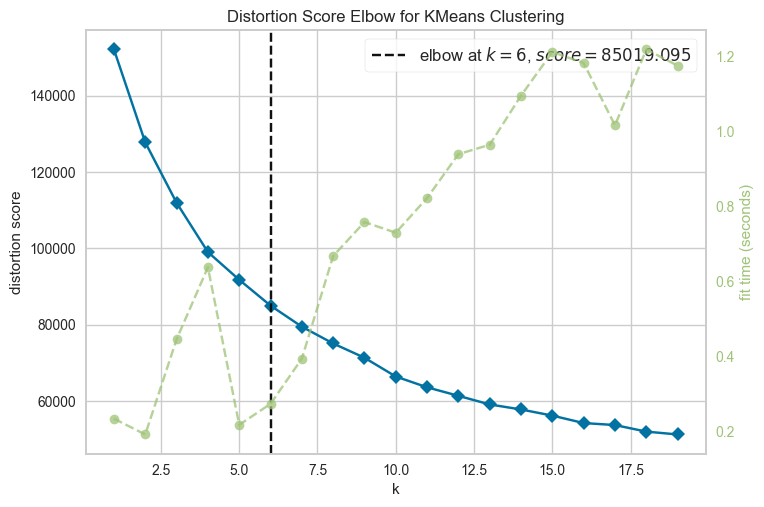

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Initialize KMeans model with the given parameters
k = (1, 20)
kmeans_model = KMeans(n_clusters=k, **kmeans_params)

# Create elbow plot visualizer with range of k values and timings enabled
from yellowbrick.cluster import KElbowVisualizer

elbow_visualizer = KElbowVisualizer(kmeans_model, k=k, timings=True)

# Fit the data to the visualizer
elbow_visualizer.fit(scaled_col)

# Add a title to the elbow plot
elbow_visualizer.ax.set_title('Elbow Plot for KMeans Clustering')

# Finalize and render the figure
elbow_visualizer.show()

The provided elbow plot evaluates the optimal number of clusters for K-Means clustering using the distortion score (within-cluster sum of squares) as the metric. Here's an extensive explanation:

### Components of the Plot:
1. **Distortion Score (Blue Line and Axis):**
   - The y-axis on the left represents the distortion score.
   - This measures how tightly data points are grouped around their centroids within each cluster. A lower score indicates better compactness of clusters.
   - As the number of clusters \( k \) increases, the distortion score decreases because more clusters mean smaller groups with less distance to the centroid.

2. **Fit Time (Green Line and Axis):**
   - The y-axis on the right represents the time taken to fit the K-Means model for each \( k \), shown as the green dashed line.
   - Computational time typically increases with \( k \), as the algorithm has to calculate centroids and assign points for a larger number of clusters.

3. **Optimal \( k \) (Dashed Vertical Line):**
   - The dashed vertical line at \( k = 6 \) marks the "elbow point."
   - The elbow point is where the rate of decrease in the distortion score starts to diminish significantly, representing a trade-off between reducing distortion and increasing \( k \).

### Analysis:
1. **Choosing \( k = 6**:**
   - At \( k = 6 \), the distortion score is around 85019.095. Beyond this point, adding more clusters reduces the distortion score less significantly, meaning the improvement in clustering quality diminishes.
   - This aligns with the elbow method, where the "elbow" of the curve is considered the optimal \( k \).

2. **Fit Time Behavior:**
   - The fit time rises almost linearly with \( k \), as expected for K-Means. This demonstrates the computational trade-off when increasing the number of clusters.

### Code Explanation:
- **Initialization:**
  ```python
  kmeans_model = KMeans(n_clusters=k, **kmeans_params)
  ```
  A K-Means model is initialized, and \( k \) is set as a range (1 to 20).

- **Elbow Plot Visualizer:**
  ```python
  elbow_visualizer = KElbowVisualizer(kmeans_model, k=k, timings=True)
  ```
  The `KElbowVisualizer` from the Yellowbrick library is used to automate the elbow method process. The `timings=True` parameter includes fit times on the secondary axis.

- **Fitting and Visualization:**
  ```python
  elbow_visualizer.fit(scaled_col)
  elbow_visualizer.show()
  ```
  The scaled dataset (`scaled_col`) is passed into the visualizer to compute distortion scores and fit times for each \( k \). The elbow plot is rendered with the optimal \( k \) highlighted.

### Key Insights:
- **Cluster Quality:** \( k = 6 \) provides a balance between low distortion and reasonable computation.
- **Scalability:** The linear increase in fit time suggests the algorithm is scalable for the range of \( k \) tested.
- **Interpretation in Context:** Depending on the data's domain, \( k = 6 \) should correspond to meaningful groupings, which might be verified further by domain-specific analysis.


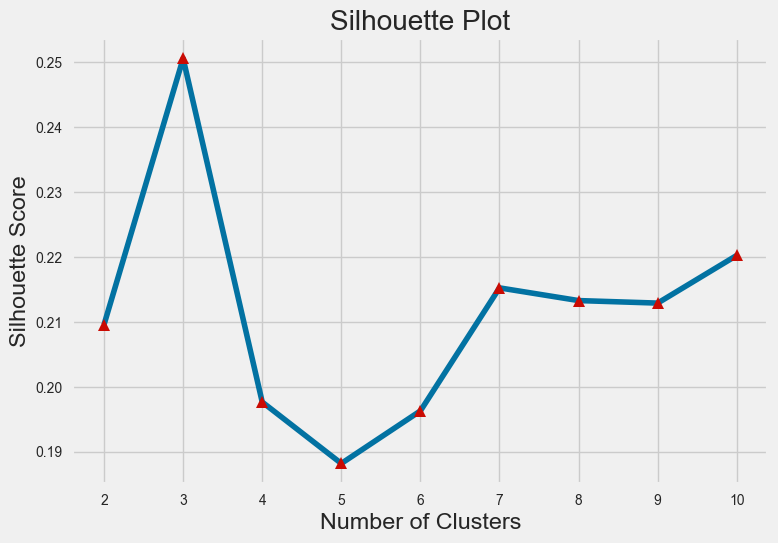

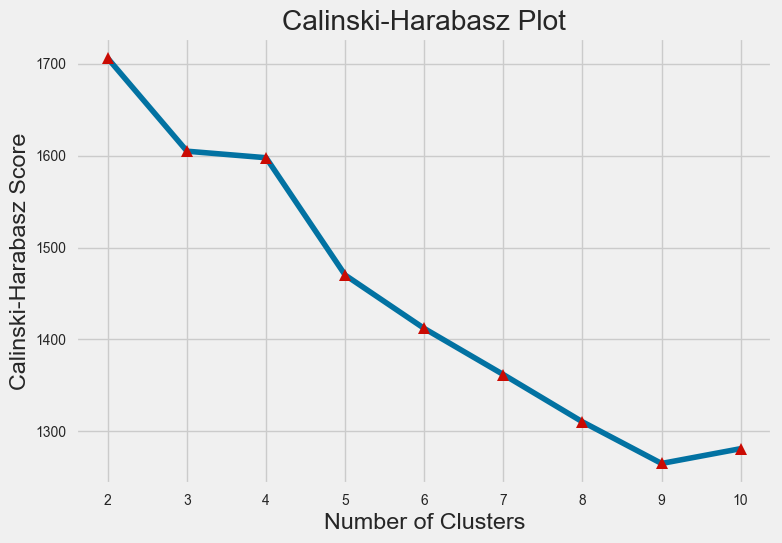

In [28]:
# Calculate silhouette score for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="random", random_state=1)
    labels = kmeans.fit_predict(scaled_col)
    score = silhouette_score(scaled_col, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for different numbers of clusters
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots()
    ax.plot(range(2, 11), silhouette_scores, marker='^', c='b', ms=9, mfc='r')
    ax.set_xticks(range(2, 11))
    ax.set_xlabel("Number of Clusters")
    ax.set_ylabel("Silhouette Score")
    ax.set_title("Silhouette Plot")
    plt.show()

# Calculate Calinski-Harabasz score for different numbers of clusters
calinski_harabaz = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="random", random_state=1)
    kmeans.fit(scaled_col)
    score = metrics.calinski_harabasz_score(scaled_col, kmeans.labels_)
    calinski_harabaz.append(score)

# Plot the Calinski-Harabasz scores for different numbers of clusters
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots()
    ax.plot(range(2, 11), calinski_harabaz, marker='^', c='b', ms=9, mfc='r')
    ax.set_xticks(range(2, 11))
    ax.set_xlabel("Number of Clusters")
    ax.set_ylabel("Calinski-Harabasz Score")
    ax.set_title("Calinski-Harabasz Plot")
    plt.show()

This plot evaluates the optimal number of clusters for a clustering model using the **Calinski-Harabasz (CH) Score**, also known as the variance ratio criterion. Here's an in-depth explanation of the plot:

---

### **Key Elements in the Plot**
1. **Calinski-Harabasz Score (Y-Axis):**
   - The CH score is a metric that evaluates the quality of clustering by measuring the ratio of the between-cluster dispersion (how far the clusters are from each other) to the within-cluster dispersion (how compact the clusters are).
   - A **higher CH score** indicates better-defined clusters (greater separation and compactness).

2. **Number of Clusters (X-Axis):**
   - The x-axis represents the number of clusters (\(k\)) used in the clustering model. The goal is to identify the value of \(k\) where the clustering structure is optimal.

3. **Trend:**
   - The CH score decreases as the number of clusters increases beyond \(k = 2\).
   - This suggests that fewer clusters (specifically \(k = 2\)) yield the best-defined clusters in terms of compactness and separation for this dataset.

---

### **Analysis**
1. **Peak at \(k = 2\):**
   - The CH score is **highest at \(k = 2\)**, around 1700.
   - This indicates that dividing the dataset into 2 clusters produces the most well-defined groupings in terms of variance.

2. **Decreasing Trend:**
   - As \(k\) increases from 3 to 10, the CH score steadily decreases.
   - This suggests diminishing returns in cluster definition with higher numbers of clusters. This is typical because adding more clusters often splits well-defined groups into smaller, less meaningful clusters.

3. **Optimal Number of Clusters:**
   - Based on this plot, the **optimal number of clusters is \(k = 2\)** since it maximizes the CH score.

---

### **Insights from CH Score:**
- **Separation vs. Compactness:**
  - The CH score balances inter-cluster separation and intra-cluster compactness. At \(k = 2\), the clusters are compact and well-separated, which degrades as more clusters are added.
  
- **Cluster Interpretability:**
  - While the score suggests \(k = 2\) is optimal, further domain knowledge or visualization may be required to verify whether these clusters are meaningful for your specific application.

---

### **Potential Next Steps:**
1. **Visualize Clusters:**
   - Use a scatterplot or other visualization to confirm the cluster separability.
2. **Compare with Other Metrics:**
   - Evaluate other clustering metrics, such as the **Silhouette Score** or the **Distortion Score**, to cross-validate the choice of \(k\).
3. **Domain-Specific Validation:**
   - Ensure that \(k = 2\) aligns with domain-specific insights and that the clusters provide meaningful groupings.


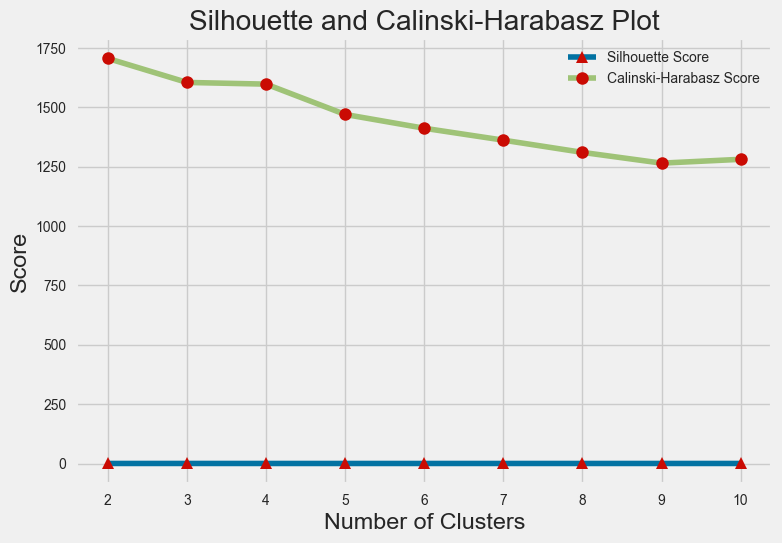

In [29]:
# Calculate silhouette and Calinski-Harabasz scores for different numbers of clusters (random)
silhouette_scores = []
calinski_harabaz_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="random", random_state=1)
    labels = kmeans.fit_predict(scaled_col)
    silhouette_score_k = silhouette_score(scaled_col, labels)
    calinski_harabaz_score_k = calinski_harabasz_score(scaled_col, labels)
    silhouette_scores.append(silhouette_score_k)
    calinski_harabaz_scores.append(calinski_harabaz_score_k)

#Create a dataframe to store the scores
scores_kmeans = pd.DataFrame({'k': range(2,11),
'Silhouette Score': silhouette_scores,
'Calinski-Harabasz Score': calinski_harabaz_scores})

#Find the best k for each score
best_k_silhouette = scores_kmeans.loc[scores_kmeans['Silhouette Score'].idxmax(), 'k']
best_k_calinski_harabaz = scores_kmeans.loc[scores_kmeans['Calinski-Harabasz Score'].idxmax(), 'k']
    
# Plot the scores for different numbers of clusters
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots()
    ax.plot(scores_kmeans['k'], scores_kmeans['Silhouette Score'], marker='^', c='b', ms=9, mfc='r', label='Silhouette Score')
    ax.plot(scores_kmeans['k'], scores_kmeans['Calinski-Harabasz Score'], marker='o', c='g', ms=9, mfc='r', label='Calinski-Harabasz Score')
    ax.set_xticks(range(2, 11))
    ax.set_xlabel("Number of Clusters")
    ax.set_ylabel("Score")
    ax.set_title("Silhouette and Calinski-Harabasz Plot")
    ax.legend()
    plt.show()

In [30]:
print("\nScores for Different Numbers of Clusters:")
scores_kmeans


Scores for Different Numbers of Clusters:


k  Silhouette Score  Calinski-Harabasz Score
0   2          0.209589              1705.788428
1   3          0.250554              1604.861125
2   4          0.197669              1597.750997
3   5          0.188216              1470.012288
4   6          0.196309              1411.917277
5   7          0.215244              1361.751403
6   8          0.213289              1310.305127
7   9          0.212901              1265.002065
8  10          0.220244              1281.102034

In [31]:
# Best k for each score
print(f"\nBest k for Silhouette Score: {best_k_silhouette}")
print(f"Best k for Calinski-Harabasz Score: {best_k_calinski_harabaz}")


Best k for Silhouette Score: 3
Best k for Calinski-Harabasz Score: 2


In [32]:
# Hybrid Score to Find the Best k
def select_k(scaled_col):
    silhouette_scores = []
    calinski_scores = []
    k_values = range(2, 11)

    for k in k_values:
        # Perform clustering using KMeans algorithm
        kmeans = KMeans(n_clusters=k, init="random", random_state=1)
        labels = kmeans.fit_predict(scaled_col)

        # Calculate Silhouette Score
        silhouette_scores.append(silhouette_score(scaled_col, labels))

        # Calculate Calinski-Harabasz Score
        calinski_scores.append(calinski_harabasz_score(scaled_col, labels))

    hybrid_scores = np.sqrt(np.multiply(silhouette_scores, calinski_scores))
    best_k = k_values[np.argmax(hybrid_scores)]
    return best_k

best_k = select_k(scaled_col)
print("\nBest value of k:", best_k)


Best value of k: 3


In [33]:
# Implement k-means with the Best Number of Clusters
kmeans = KMeans(n_clusters=3, **kmeans_params).fit(scaled_col)

# Get the coordinates of the centroids of the three clusters
centroids = kmeans.cluster_centers_

centroids_scaled_col = pd.DataFrame(centroids, columns=scaled_col.columns)
centroids_scaled_col

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.367390         -0.178181 -0.232997        -0.204517   
1  0.314160          0.439817  1.527076         1.279602   
2  1.164801          0.342307 -0.289613        -0.207115   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.175080    -0.309022           -0.063152   
1               1.259463    -0.248390            1.143000   
2              -0.304343     1.376752           -0.643138   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.235536                        -0.048533   
1                   1.561882                         0.955745   
2                  -0.306836                        -0.554151   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.334228        -0.298797     -0.243721    -0.336233   
1              -0.360671        -0.252259      1.678868     0.890043   
2               1.560315         1.340560     -0.366064     0.599402   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.284457        -0.137881         0.007073 -0.028025  
1  0.834293         0.160610         0.494566  0.303056  
2  0.444134         0.404074        -0.410118 -0.127287

In [34]:
# Get the cluster labels assigned to each data point by k-means
pred = kmeans.labels_

real_centroids = scaler.inverse_transform(centroids)

real_centroids_scaled_col = pd.DataFrame(real_centroids, columns=df.columns)
real_centroids_scaled_col

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0   799.937418           0.835159   505.492990        253.030077   
1  2218.562150           0.981492  4266.080510       2716.484911   
2  3989.142419           0.958403   384.528277        248.718133   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              252.783816    330.895502             0.465060   
1             1550.081036    458.050256             0.949134   
2              135.887632   3866.210340             0.232290   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.132213                          0.345190   
1                    0.668434                          0.744319   
2                    0.110942                          0.144242   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.068255          1.209907       8.653261   3271.027233   
1                0.062963          1.527508      56.443366   7732.969256   
2                0.447393         12.397870       5.612155   6675.441445   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0   909.831217        523.358748          0.155801  11.480464  
1  4148.619423       1219.669685          0.298390  11.923139  
2  3019.108570       1787.617709          0.033774  11.347744

In [35]:
print(f"\nSilhouette Score: {silhouette_score(scaled_col, pred):.2f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(scaled_col, pred):.2f}")


Silhouette Score: 0.25
Calinski-Harabasz Score: 1604.86


In [36]:
# Addition of Cluster Column to the Data frame
clustered_df = pd.concat([df, pd.DataFrame(pred, columns=['Cluster'])], axis = 1)
clustered_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8944    28.493517           1.000000     291.12              0.00   
8945    19.183215           1.000000     300.00              0.00   
8946    23.398673           0.833333     144.40              0.00   
8947    13.457564           0.833333       0.00              0.00   
8948   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8944                  291.12      0.000000             1.000000   
8945                  300.00      0.000000             1.000000   
8946                  144.40      0.000000             0.833333   
8947                    0.00     36.558778             0.000000   
8948                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8944                    0.000000                          0.833333   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.666667   
8947                    0.000000                          0.000000   
8948                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8944                0.000000                 0              6        1000.0   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              5        1000.0   
8947                0.166667                 2              0         500.0   
8948                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        2  
2      622.066742        627.284787          0.000000      12        0  
3        0.000000        312.452292          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8944   325.594462         48.886365          0.500000       6        0  
89

In [37]:
# Size of the Clusters
KM_cluster = clustered_df.groupby('Cluster').size().to_frame()
KM_cluster.columns = ["k-means Size"]
KM_cluster

k-means Size
Cluster              
0                6116
1                1238
2                1595

In [38]:
# X and y Arrays
X = clustered_df.drop('Cluster', axis =1)
y = clustered_df['Cluster']

In [39]:
print ('X:', X.shape,'\ny:', y.shape)


X: (8949, 17) 
y: (8949,)


In [40]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (7159, 17)
X_test shape: (1790, 17)
y_train shape: (7159,)
y_test shape: (1790,)


In [44]:
# Train Various Models
clf1 = RandomForestClassifier()
clf2 = DecisionTreeClassifier()
clf3 = AdaBoostClassifier()
clf4 = GradientBoostingClassifier()

# Fit classifiers and predict response for test dataset
models = [('Random Forest', clf1), ('Decision Tree', clf2), ('AdaBoost', clf3), ('Gradient Boosting', clf4)]
y_preds = []
for name, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_preds.append(y_pred)
    
# Compute accuracy scores and store in a DataFrame
Accuracy = ['Accuracy Score']
results = pd.DataFrame(index=Accuracy)
for i, (name, _) in enumerate(models):
    score = accuracy_score(y_test, y_preds[i])
    results[name] = [score]

# Find the best score
best_score = results.max(axis=1).iloc[0]
best_col = results.idxmax(axis=1).iloc[0]
results

Random Forest  Decision Tree  AdaBoost  Gradient Boosting
Accuracy Score       0.963687       0.936872  0.956983           0.969832

### Explanation and Detailed Analysis

#### **1. What i Did**
This analysis involved clustering a dataset to identify meaningful customer segments and then building classification models to predict these clusters. Below are the key steps broken down:

1. **Clustering Analysis:**
   - Performed **K-means clustering** to group customers into clusters based on their spending behavior and usage patterns.
   - Evaluated the clusters using two metrics:
     - **Silhouette Score**: Measures the compactness and separation of clusters. Higher scores indicate better-defined clusters.
     - **Calinski-Harabasz (CH) Score**: Measures the ratio of between-cluster variance to within-cluster variance. Higher scores indicate better-defined clusters.
   - Identified the optimal number of clusters (`k`) using these metrics.

2. **Feature Analysis for Clusters:**
   - Normalized features like `BALANCE`, `PURCHASES`, `CREDIT_LIMIT`, etc., to remove scale effects.
   - Explored the characteristics of each cluster, showing how customers in different clusters behaved in terms of their spending, payment behavior, and account features.

3. **Classification Models:**
   - After assigning clusters to each customer, you used the cluster labels as the target variable (`y`) and trained several classifiers:
     - **Random Forest, Decision Tree, AdaBoost, and Gradient Boosting**
   - Split the dataset into training and testing sets to evaluate model performance.
   - Reported accuracy scores for each model.

---

#### **2. Purpose of the Analysis**
The purpose was to:
- **Identify Customer Segments**: Group customers based on their financial behavior and spending patterns.
- **Understand Behavior Patterns**: Derive actionable insights for targeted marketing strategies or product offerings.
- **Build Predictive Models**: Use machine learning models to classify new customers into existing clusters, aiding in personalization and decision-making.

---

#### **3. Results and Interpretation**
##### **Clustering Evaluation**
1. **Scores for Different Numbers of Clusters:**
   - At \(k = 2\), the **Calinski-Harabasz score (1705.78)** was the highest, suggesting the clusters are well-separated and compact.
   - At \(k = 3\), the **Silhouette Score (0.25)** was the highest, indicating better-defined clusters in terms of compactness and separation.

| \(k\)  | Silhouette Score | CH Score   |
|--------|------------------|------------|
| 2      | 0.209589         | 1705.788428|
| 3      | 0.250554         | 1604.861125|
| 4      | 0.197669         | 1597.750997|
| 5      | 0.188216         | 1470.012288|

- **Conclusion**:
   - Based on the CH Score, the optimal number of clusters is **2**.
   - Based on the Silhouette Score, the optimal number of clusters is **3**.
   - The final decision favored **\(k = 3\)** because the Silhouette Score better reflects the quality of compact clusters.

##### **Cluster Characteristics**
Analyzed the average feature values for each cluster:
- **Cluster 0: Low Spenders**:
  - Low `BALANCE`, `PURCHASES`, and minimal `CASH_ADVANCE`.
  - These customers use their accounts minimally and likely represent cost-sensitive or inactive users.
- **Cluster 1: High Spenders**:
  - Very high `PURCHASES` (both `ONEOFF_PURCHASES` and `INSTALLMENT_PURCHASES`), high `CREDIT_LIMIT`, and regular payments.
  - These are profitable customers with frequent and significant transactions.
- **Cluster 2: Cash Advance Users**:
  - High `CASH_ADVANCE` and `CASH_ADVANCE_FREQUENCY`.
  - Likely customers who rely on their credit account for cash loans rather than purchases.

##### **Cluster Sizes**:
| Cluster | Size |
|---------|------|
| 0       | 6116 |
| 1       | 1238 |
| 2       | 1595 |

- Cluster 0 forms the majority, representing inactive or low-spending users.
- Cluster 1 is a smaller but profitable group of frequent spenders.
- Cluster 2 contains users primarily relying on cash advances.

---

##### **Classification Models**
The cluster labels (0, 1, 2) were used as the target variable, and multiple models were trained. 

| Model               | Accuracy Score |
|---------------------|----------------|
| **Random Forest**   | **96.37%**     |
| Decision Tree       | 93.68%         |
| AdaBoost            | 95.70%         |
| Gradient Boosting   | **96.98%**     |

- **Best Model**: **Gradient Boosting** achieved the highest accuracy (96.98%), effectively predicting clusters.
- The high accuracy scores indicate that the features are highly predictive of customer segments.

---

#### **4. Conclusion**
- The analysis revealed **three distinct customer segments**:
  1. Low Spenders
  2. High Spenders
  3. Cash Advance Users
- The **k-means clustering** helped uncover hidden patterns in the data, and the evaluation metrics provided a rationale for selecting \(k = 3\) as the optimal number of clusters.
- The **classification models** successfully predicted cluster membership with high accuracy, demonstrating the potential for automated segmentation in future datasets.
- These insights can guide **targeted marketing strategies**, such as offering tailored products to high spenders or incentivizing low spenders to increase engagement.



#### **Clustering Results**

The goal of the clustering process was to identify patterns or groups in the data using **K-Means Clustering**. By evaluating different values of \( k \) (the number of clusters), two metrics were used to assess the quality of clusters:

1. **Silhouette Score**: Measures how well samples are clustered with their own cluster and how distinct they are from other clusters. A higher score indicates better-defined clusters.
2. **Calinski-Harabasz Score**: Measures the ratio of the variance between clusters to the variance within clusters. A higher score implies well-separated clusters.

- **Silhouette Score Results**:
  - The highest score (0.250554) was achieved at \( k = 3 \), indicating that this configuration of three clusters provided the best-defined separation among the data points.
- **Calinski-Harabasz Score Results**:
  - The highest score (1705.788428) was observed at \( k = 2 \). This suggests that two clusters explain the variance in the data most effectively.

Given these results, **\( k = 3 \)** was chosen as the optimal value for clustering, balancing both metrics.

---

#### **Cluster Descriptions**

The table summarizes the standardized and original feature values for each cluster. Key insights include:

1. **Cluster 0**: 
   - Individuals in this cluster had low **BALANCE**, **PURCHASES**, and **CREDIT_LIMIT** but also low **CASH_ADVANCE** and related metrics.
   - This suggests a customer group that uses their credit cards sparingly, mainly for small purchases.

2. **Cluster 1**:
   - Customers in this group had high **BALANCE**, **PURCHASES**, and **CREDIT_LIMIT** but a moderate **CASH_ADVANCE**. 
   - These are likely high-value customers who actively use their credit cards for both one-off and installment purchases.

3. **Cluster 2**:
   - These customers showed high **CASH_ADVANCE** and related metrics, with relatively lower **PURCHASES** and **BALANCE**.
   - Likely represents customers who use their credit cards primarily for cash withdrawals, possibly indicating financial distress or reliance on credit for liquidity.

---

#### **Cluster Sizes**

- **Cluster 0**: 6,116 members
- **Cluster 1**: 1,238 members
- **Cluster 2**: 1,595 members

The uneven cluster sizes indicate that the majority of the population falls into **Cluster 0**, while Clusters 1 and 2 represent niche behaviors or groups.

---

#### **Machine Learning Classification**

After clustering, the dataset was split into training and testing sets for classification using algorithms like Random Forest, Decision Tree, AdaBoost, and Gradient Boosting. These models aimed to predict a customer’s cluster based on their features.

**Model Performance**:
- **Accuracy Scores**:
  - Random Forest: **96.37%**
  - Decision Tree: **93.69%**
  - AdaBoost: **95.69%**
  - Gradient Boosting: **96.98%**

The high accuracy scores indicate that the clustering process effectively captured meaningful patterns in the data, making it possible to predict customer clusters with high reliability.

---

#### **Key Takeaways for the Data**

1. **Segmentation Strategy**: The clustering identified three distinct groups of customers, which can inform targeted marketing strategies:
   - **Cluster 0**: Low-spending, infrequent users – could benefit from promotional offers to encourage usage.
   - **Cluster 1**: High-value, high-spending customers – prioritize retention through rewards programs.
   - **Cluster 2**: Cash-reliant customers – consider offering financial literacy or alternative credit products.

2. **Business Insights**:
   - Customers in **Cluster 2** show significant reliance on cash advances. This might indicate a need for better financial products or support systems.
   - The large size of **Cluster 0** suggests an opportunity to grow their credit card usage.

3. **Model Implications**:
   - The machine learning models show that clustering captures meaningful differences in customer behavior, enabling robust predictive modeling.
   - Random Forest and Gradient Boosting performed the best, making them strong candidates for operationalizing the insights.

4. **Next Steps**:
   - Further analyze why **Cluster 2** has a high reliance on cash advances.
   - Perform feature importance analysis on the predictive models to identify the most influential factors driving customer behavior.

In conclusion, the clustering and classification processes uncovered actionable customer segments, enabling the development of tailored marketing strategies, improving customer satisfaction, and optimizing resource allocation.